In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel("Sample - Superstore.xlsx")

In [5]:
df.head(5)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Data Wrangling

In [10]:
#check for duplicate values
df.duplicated().sum()

0

In [11]:
#check for null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

EDA

In [13]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
type_of_customer=df['Segment'].unique()
print(type_of_customer)

['Consumer' 'Corporate' 'Home Office']


In [23]:
no_of_customer=df['Segment'].value_counts().reset_index()
no_of_customer.rename(columns={'index':'Customer type','Segment':'Total Customer'},inplace=True)
print(no_of_customer)

  Customer type  Total Customer
0      Consumer            5191
1     Corporate            3020
2   Home Office            1783


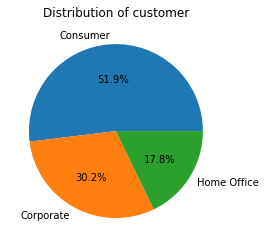

In [31]:
#plotting pie chart

plt.pie(no_of_customer['Total Customer'],labels=no_of_customer['Customer type'],autopct="%1.1f%%")
plt.title('Distribution of customer')
plt.show()

Segments and there sales

In [32]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [37]:
sales_per_category=df.groupby(['Segment'])['Sales'].sum().reset_index()
sales_per_category.rename(columns={'Segment':'Customer type','Sales':'Total Sales'},inplace=True)
print(sales_per_category)

  Customer type   Total Sales
0      Consumer  1.161401e+06
1     Corporate  7.061464e+05
2   Home Office  4.296531e+05


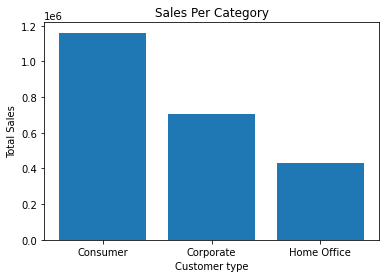

In [44]:
plt.bar(sales_per_category['Customer type'],sales_per_category['Total Sales'])
plt.title("Sales Per Category")
plt.xlabel("Customer type")
plt.ylabel("Total Sales")
plt.show()

Geographical Analysis

In [92]:
# No of States
state=df['State'].value_counts().reset_index()
print(state)


                   index  State
0             California   2001
1               New York   1128
2                  Texas    985
3           Pennsylvania    587
4             Washington    506
5               Illinois    492
6                   Ohio    469
7                Florida    383
8               Michigan    255
9         North Carolina    249
10              Virginia    224
11               Arizona    224
12               Georgia    184
13             Tennessee    183
14              Colorado    182
15               Indiana    149
16              Kentucky    139
17         Massachusetts    135
18            New Jersey    130
19                Oregon    124
20             Wisconsin    110
21              Maryland    105
22              Delaware     96
23             Minnesota     89
24           Connecticut     82
25              Oklahoma     66
26              Missouri     66
27               Alabama     61
28              Arkansas     60
29          Rhode Island     56
30      

In [94]:
# States per sale
state_sale=df.groupby(['State'])['Sales'].sum().reset_index()
state_sale.rename(columns={'Sales':'Total Sales'})

                  
print(state_sale)


                   State        Sales
0                Alabama   19510.6400
1                Arizona   35282.0010
2               Arkansas   11678.1300
3             California  457687.6315
4               Colorado   32108.1180
5            Connecticut   13384.3570
6               Delaware   27451.0690
7   District of Columbia    2865.0200
8                Florida   89473.7080
9                Georgia   49095.8400
10                 Idaho    4382.4860
11              Illinois   80166.1010
12               Indiana   53555.3600
13                  Iowa    4579.7600
14                Kansas    2914.3100
15              Kentucky   36591.7500
16             Louisiana    9217.0300
17                 Maine    1270.5300
18              Maryland   23705.5230
19         Massachusetts   28634.4340
20              Michigan   76269.6140
21             Minnesota   29863.1500
22           Mississippi   10771.3400
23              Missouri   22205.1500
24               Montana    5589.3520
25          

In [95]:
# No of Cities
state=df['City'].value_counts().reset_index()
print(state)


              index  City
0     New York City   915
1       Los Angeles   747
2      Philadelphia   537
3     San Francisco   510
4           Seattle   428
..              ...   ...
526         Danbury     1
527       Melbourne     1
528         Redding     1
529  Citrus Heights     1
530       La Quinta     1

[531 rows x 2 columns]


In [96]:
# City per sale
state_sale=df.groupby(['City'])['Sales'].sum().reset_index()
state_sale.rename(columns={'Sales':'Total Sales'})

                  
print(state_sale)

            City     Sales
0       Aberdeen    25.500
1        Abilene     1.392
2          Akron  2729.986
3    Albuquerque  2220.160
4     Alexandria  5519.570
..           ...       ...
526   Woonsocket   195.550
527      Yonkers  7657.666
528         York   817.978
529      Yucaipa    50.800
530         Yuma   840.865

[531 rows x 2 columns]


Product Analysis

In [46]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [58]:
products=df['Category'].unique()
print(products)

Sub_category_count=df.groupby(['Category'])['Sub-Category'].nunique().reset_index()
Sub_category_count.sort_values(by='Sub-Category',inplace=True,ascending=False)

print(Sub_category_count.reset_index(drop=True))

['Furniture' 'Office Supplies' 'Technology']
          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


Sales Per Product

In [60]:
sales_per_product=df.groupby(['Category'])['Sales'].sum().reset_index()
sales_per_product.rename(columns={'Sales':'Total Sales'},inplace=True)
print(sales_per_product)

          Category  Total Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


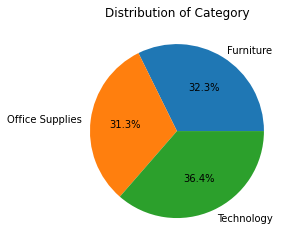

In [62]:
# plotting pie chart
plt.pie(sales_per_product['Total Sales'],labels=sales_per_product['Category'],autopct="%1.1f%%")
plt.title('Distribution of Category')
plt.show()

Sales Trend Analysis

In [64]:
df.head(1)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1456,1457,CA-2017-148474,2017-06-12,2017-06-19,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Columbus,...,31907,South,FUR-TA-10002530,Furniture,Tables,"Iceberg OfficeWorks 42"" Round Tables",452.94,3,0.0,67.941


In [65]:
#Convert date to date time format
df['Order Date']=pd.to_datetime(df['Order Date'],dayfirst=True)

In [69]:
#Grouping the year and summing the sales
yearly_sales=df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales.rename(columns={'Order Date':'Years','Sales':'Total Sales'},inplace=True)
print(yearly_sales)

   Years  Total Sales
0   2014  484247.4981
1   2015  470532.5090
2   2016  609205.5980
3   2017  733215.2552


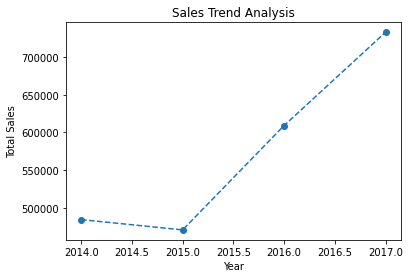

In [82]:
#plot the line graph
plt.plot(yearly_sales['Years'],yearly_sales['Total Sales'],marker='o',linestyle='--')
plt.title("Sales Trend Analysis")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

In [87]:
# Quaterly Sales
df['Order Date']=pd.to_datetime(df['Order Date'],dayfirst=True)
year_sales=df[df['Order Date'].dt.year==2017]
Quaterly_sales=year_sales.resample('Q',on='Order Date')['Sales'].sum()
print(Quaterly_sales)

Order Date
2017-03-31    123144.8602
2017-06-30    133764.3720
2017-09-30    196251.9560
2017-12-31    280054.0670
Freq: Q-DEC, Name: Sales, dtype: float64
